In [ ]:
import pandas as pd
import numpy as np

In [ ]:
terror = pd.read_csv('/content/drive/My Drive/globalterrorismdb_0718dist.csv',encoding='latin1')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
terror.describe()

In [ ]:
terror.shape

(181691, 135)

In [ ]:
terror.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [ ]:
#dropped eventid since it is having all unique values and other features which are not necessary
del terror['eventid']
del terror['region']
del terror['attacktype1']
del terror['country']
del terror['INT_LOG']
del terror['INT_IDEO']
del terror['INT_MISC']
del terror['INT_ANY']

In [ ]:
for column in list(terror.columns):
  if terror[column].isnull().sum()>(0.40*150):
    terror.drop(columns=column, axis=1,inplace=True)
  elif terror[column].isnull().sum():
    terror[column].replace(np.nan,terror[column].mean(),inplace=True)
  else:
    continue
terror

In [ ]:
terror

,iyear,imonth,iday,extended,country_txt,region_txt,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1_txt,targtype1,targtype1_txt,gname,individual,weaptype1,weaptype1_txt,property,dbsource
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,1.0,0,1,1,1,0.0,0.0,1,0,Assassination,14,Private Citizens & Property,MANO-D,0,13,Unknown,0,PGIS
1,1970,0,0,0,Mexico,North America,1.0,0,1,1,1,0.0,0.0,1,0,Hostage Taking (Kidnapping),7,Government (Diplomatic),23rd of September Communist League,0,13,Unknown,0,PGIS
2,1970,1,0,0,Philippines,Southeast Asia,4.0,0,1,1,1,0.0,0.0,1,0,Assassination,10,Journalists & Media,Unknown,0,13,Unknown,0,PGIS
3,1970,1,0,0,Greece,Western Europe,1.0,0,1,1,1,0.0,0.0,1,0,Bombing/Explosion,7,Government (Diplomatic),Unknown,0,6,Explosives,1,PGIS
4,1970,1,0,0,Japan,East Asia,1.0,0,1,1,1,-9.0,0.0,1,0,Facility/Infrastructure Attack,7,Government (Diplomatic),Unknown,0,8,Incendiary,1,PGIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,0,Somalia,Sub-Saharan Africa,2.0,0,1,1,0,1.0,0.0,1,0,Armed Assault,4,Military,Al-Shabaab,0,5,Firearms,-9,START Primary Collection
181687,2017,12,31,0,Syria,Middle East & North Africa,1.0,1,1,1,0,1.0,0.0,1,0,Bombing/Explosion,4,Military,Muslim extremists,0,6,Explosives,1,START Primary Collection
181688,2017,12,31,0,Philippines,Southeast Asia,2.0,0,1,1,1,0.0,0.0,1,0,Facility/Infrastructure Attack,14,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),0,8,Incendiary,1,START Primary Collection
181689,2017,12,31,0,India,South Asia,1.0,0,1,1,1,0.0,0.0,0,0,Bombing/Explosion,2,Government (General),Unknown,0,6,Explosives,-9,START Primary Collection


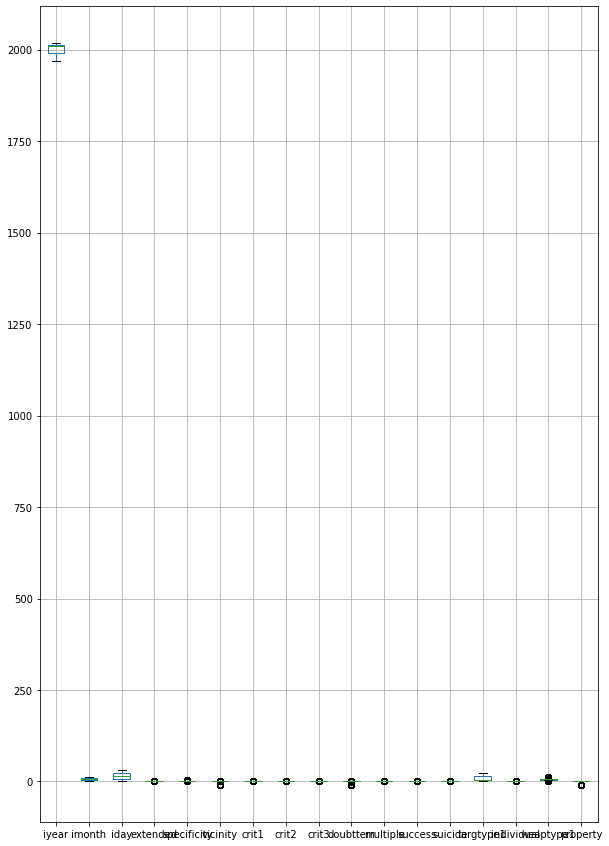

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
terror.boxplot(figsize=(10,15))
plt.show()

In [ ]:

terror= terror.drop(['eventid'],axis=1)

In [ ]:
terror.value_counts(["iyear","imonth","iday","extended","country","country_txt","region","region_txt","specificity","vicinity","crit1","crit2","crit3","doubtterr","multiple","success","suicide","attacktype1","attacktype1_txt","targtype1","targtype1_txt","gname","individual","weaptype1","weaptype1_txt","property","dbsource","INT_LOG","INT_IDEO","INT_MISC","INT_ANY"])

In [ ]:
q1 = terror['extended'].quantile(.25)
q3 = terror['extended'].quantile(.75)
IQR = q3-q1
terror['extended'] = np.clip(terror['extended'],q1-1.5*IQR, q3+1.5*IQR)
q1 = terror['country'].quantile(.25)
q3 = terror['country'].quantile(.75)
IQR = q3-q1
terror['country'] = np.clip(terror['country'],q1-1.5*IQR, q3+1.5*IQR)
q1 = terror['specificity'].quantile(.25)
q3 = terror['specificity'].quantile(.75)
IQR = q3-q1
terror['specificity'] = np.clip(terror['specificity'],q1-1.5*IQR, q3+1.5*IQR)
q1 = terror['vicinity'].quantile(.25)
q3 = terror['vicinity'].quantile(.75)
IQR = q3-q1
terror['vicinity'] = np.clip(terror['vicinity'],q1-1.5*IQR, q3+1.5*IQR)
q1 = terror['crit1'].quantile(.25)
q3 = terror['crit1'].quantile(.75)
IQR = q3-q1
terror['crit1'] = np.clip(terror['crit1'],q1-1.5*IQR, q3+1.5*IQR)
q1 = terror['crit3'].quantile(.25)
q3 = terror['crit3'].quantile(.75)
IQR = q3-q1
terror['crit3'] = np.clip(terror['crit3'],q1-1.5*IQR, q3+1.5*IQR)

q1 = terror['crit2'].quantile(.25)
q3 = terror['crit2'].quantile(.75)
IQR = q3-q1
terror['crit2'] = np.clip(terror['crit2'],q1-1.5*IQR, q3+1.5*IQR)

q1 = terror['doubtterr'].quantile(.25)
q3 = terror['doubtterr'].quantile(.75)
IQR = q3-q1
terror['doubtterr'] = np.clip(terror['doubtterr'],q1-1.5*IQR, q3+1.5*IQR)
q1 = terror['multiple'].quantile(.25)
q3 = terror['multiple'].quantile(.75)
IQR = q3-q1
terror['multiple'] = np.clip(terror['multiple'],q1-1.5*IQR, q3+1.5*IQR)
q1 = terror['success'].quantile(.25)
q3 = terror['success'].quantile(.75)
IQR = q3-q1
terror['success'] = np.clip(terror['success'],q1-1.5*IQR, q3+1.5*IQR)
q1 = terror['suicide'].quantile(.25)
q3 = terror['suicide'].quantile(.75)
IQR = q3-q1
terror['suicide'] = np.clip(terror['suicide'],q1-1.5*IQR, q3+1.5*IQR)

In [ ]:
q1 = terror['attacktype1'].quantile(.25)
q3 = terror['attacktype1'].quantile(.75)
IQR = q3-q1
terror['attacktype1'] = np.clip(terror['attacktype1'],q1-1.5*IQR, q3+1.5*IQR)

In [ ]:
q1 = terror['INT_ANY'].quantile(.25)
q3 = terror['INT_ANY'].quantile(.75)
IQR = q3-q1
terror['INT_ANY'] = np.clip(terror['INT_ANY'],q1-1.5*IQR, q3+1.5*IQR)

In [ ]:
terror

In [ ]:
print('Country with Highest Terrorist Attacks:',terror['country_txt'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terror['region_txt'].value_counts().index[0])
print('Year with Highest Terrorist Attacks:',terror['iyear'].value_counts().index[0])

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Year with Highest Terrorist Attacks: 2014


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


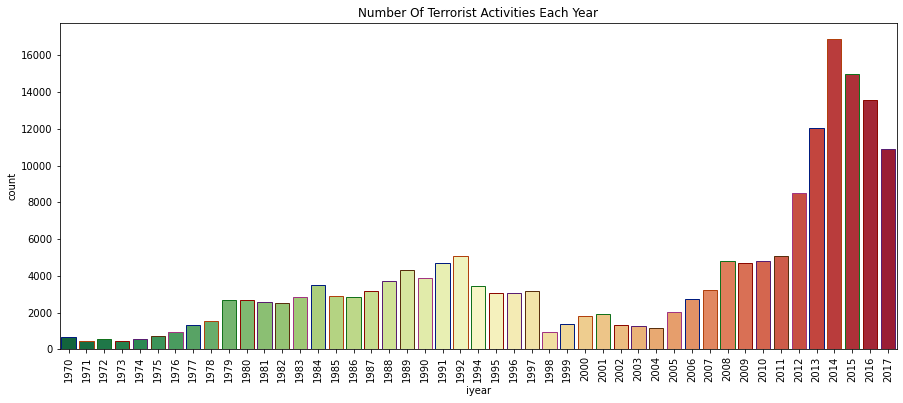

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot('iyear',data=terror,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


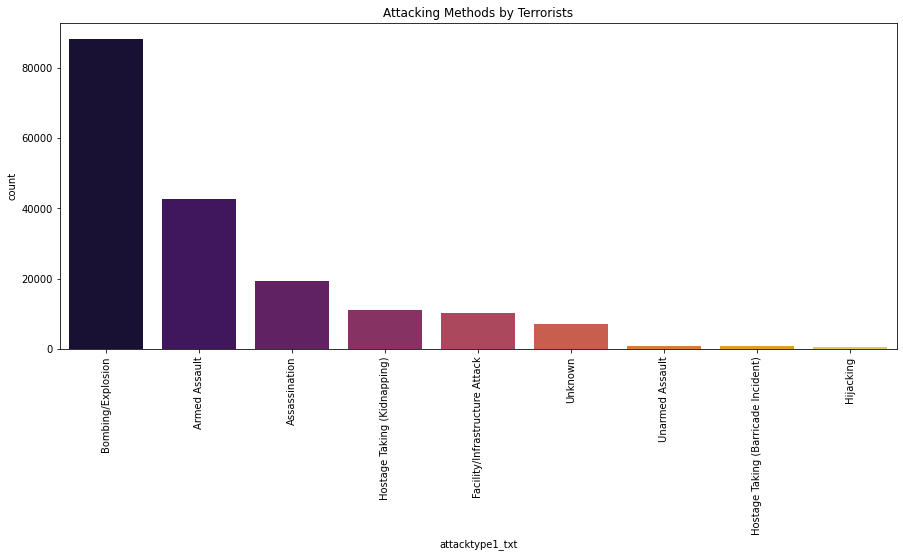

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot('attacktype1_txt',data=terror,palette='inferno',order=terror['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


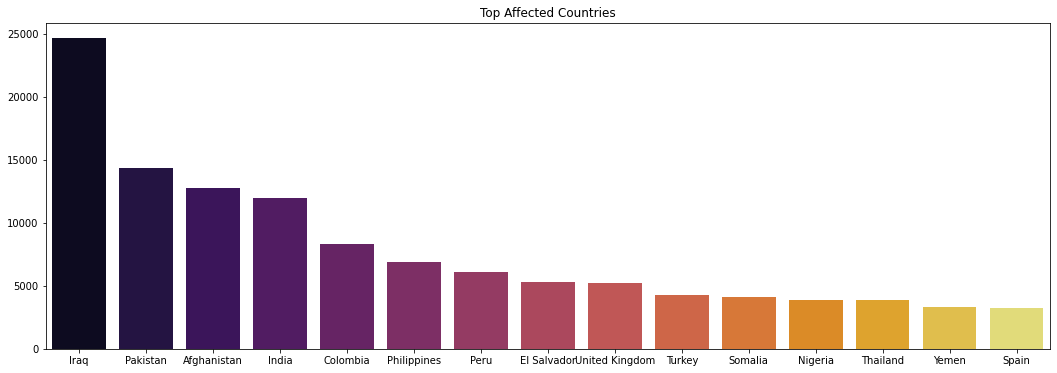

In [ ]:
plt.subplots(figsize=(18,6))
sns.barplot(terror['country_txt'].value_counts()[:15].index,terror['country_txt'].value_counts()[:15].values,palette='inferno')
plt.title('Top Affected Countries')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


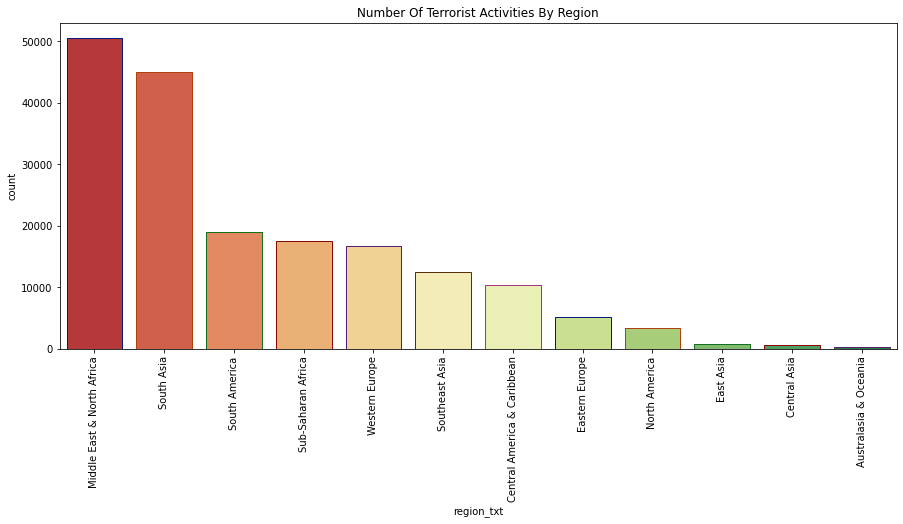

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot('region_txt',data=terror,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=terror['region_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


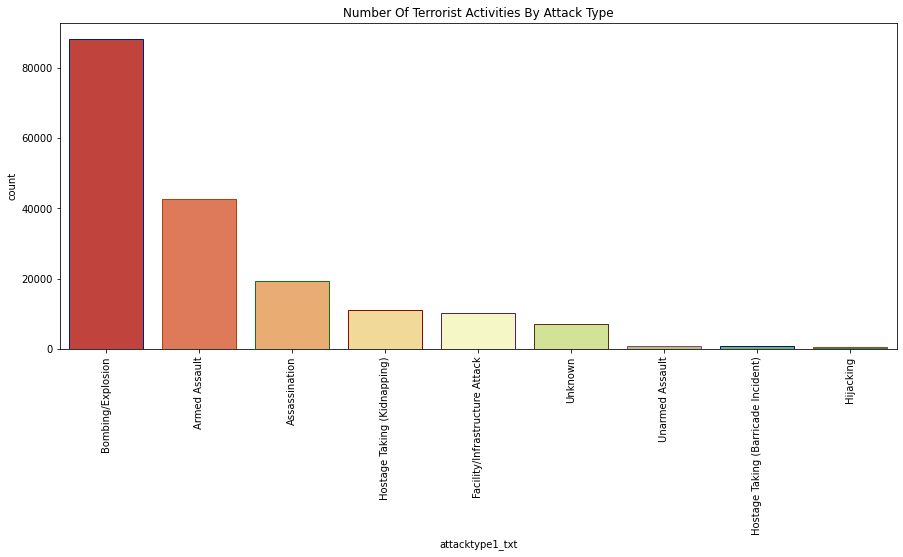

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot('attacktype1_txt',data=terror,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=terror['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Attack Type')
plt.show()

In [ ]:
terror_region=pd.crosstab(terror.iyear,terror.region_txt)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

In [ ]:
terror

,iyear,imonth,iday,approxdate,extended,resolution,country_txt,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,...,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,related
0,1970,7,2,NaN,0,NaN,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,NaN
1,1970,0,0,NaN,0,NaN,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,NaN
2,1970,1,0,NaN,0,NaN,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,NaN
3,1970,1,0,NaN,0,NaN,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,NaN
4,1970,1,0,NaN,0,NaN,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,NaN,0,NaN,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0,Somalia,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ..."

In [ ]:
import folium
terror_india=terror[terror['country_txt']=='India']
terror_india_fol=terror_india.copy()
terror_india_fol.dropna(subset=['latitude','longitude'],inplace=True)
location_ind=terror_india_fol[['latitude','longitude']][:5000]
city_ind=terror_india_fol['city'][:5000]
killed_ind=terror_india_fol['nkill'][:5000]
wound_ind=terror_india_fol['nwound'][:5000]
target_ind=terror_india_fol['targtype1_txt'][:5000]

map4 = folium.Map(location=[20.59, 78.96],tiles='CartoDB dark_matter',zoom_start=4.5)
for point in location_ind.index:
    folium.CircleMarker(list(location_ind.loc[point].values),popup='<b>City: </b>'+str(city_ind[point])+'<br><b>Killed: </b>'+str(killed_ind[point])+\
                        '<br><b>Injured: </b>'+str(wound_ind[point])+'<br><b>Target: </b>'+str(target_ind[point])).add_to(map4)
map4

In [ ]:
f,ax=plt.subplots(1,2,figsize=(25,12))
ind_groups=terror_india['Group'].value_counts()[1:11].index
ind_groups=terror_india[terror_india['Group'].isin(ind_groups)]
sns.countplot(y='Group',data=ind_groups,ax=ax[0])
ax[0].set_title('Top Terrorist Groups')
sns.countplot(y='AttackType',data=terror_india,ax=ax[1])
ax[1].set_title('Favorite Attack Types')
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)